<a href="https://colab.research.google.com/github/Abigail1410/Trabajo-final/blob/master/ANALISIS_DE_SENTIMIENTOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
from textblob import TextBlob
import csv
import re
import time
import string

In [70]:
TextBlob('I hate the Games').sentiment

Sentiment(polarity=-0.8, subjectivity=0.9)

In [84]:
TextBlob('Odio el código game').sentiment

Sentiment(polarity=-0.4, subjectivity=0.4)

In [85]:
TextBlob('Odio el código game').translate(from_lang='es', to='en').sentiment #fr, pt, it

Sentiment(polarity=-0.6000000000000001, subjectivity=0.65)

In [74]:
df = pd.read_csv('PHP.csv')
df.head(3)

,text
0,🏅🏅🏅🏅APRENDE PYTHON🏅🏅🏅🏅\n👨🏻‍💻👨🏻‍💻👨🏻‍💻👨🏻‍💻 INSCR...
1,Desarrollador PHP Magento (ID: 1766278) https:...
2,Atrévete a iniciarte en la programación de la ...


In [20]:
def clean_text(text):
  text = re.sub(r'^RT[\s]+', '', text)
  text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
  text = re.sub(r'#', '', text)
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  return text



In [21]:
df['clean_text'] = df['text'].apply(clean_text)

In [22]:
df['clean_text']

0      🏅🏅🏅🏅APRENDE PYTHON🏅🏅🏅🏅\n👨🏻‍💻👨🏻‍💻👨🏻‍💻👨🏻‍💻 INSCR...
1               Desarrollador PHP Magento (ID: 1766278) 
2      Atrévete a iniciarte en la programación de la ...
3      Descarga el código fuente de nuestros artículos. 
4      post jrgonzalez - Recortar y redimensionar imá...
                             ...                        
217    PHP es un lenguaje de programación aplicado al...
218    El sistema eco productivo, está desarrollado e...
219    Estamos buscando un desarrollador web con cono...
220         post jrgonzalez - Fechas como string en PHP 
221    Te apasiona la programación en PHP? Plataforma...
Name: clean_text, Length: 222, dtype: object

In [60]:
def get_polarity(text):
  analysis = TextBlob(text)
  if text != '':
    if analysis.detect_language() == 'es':
      result = analysis.translate(from_lang = 'es', to = 'en').sentiment.polarity
      time.sleep(5)
      return result

In [58]:
df['polarity'] = df['clean_text'].apply(get_polarity)

In [59]:
df['polarity'].head(3)

0    0.0
1    0.0
2    0.0
Name: polarity, dtype: float64

In [26]:
df.head(3)

,text,clean_text
0,🏅🏅🏅🏅APRENDE PYTHON🏅🏅🏅🏅\n👨🏻‍💻👨🏻‍💻👨🏻‍💻👨🏻‍💻 INSCR...,🏅🏅🏅🏅APRENDE PYTHON🏅🏅🏅🏅\n👨🏻‍💻👨🏻‍💻👨🏻‍💻👨🏻‍💻 INSCR...
1,Desarrollador PHP Magento (ID: 1766278) https:...,Desarrollador PHP Magento (ID: 1766278)
2,Atrévete a iniciarte en la programación de la ...,Atrévete a iniciarte en la programación de la ...


In [44]:
df[df.polarity < 0.3][['text', 'polarity']].head()

,text,polarity
0,🏅🏅🏅🏅APRENDE PYTHON🏅🏅🏅🏅\n👨🏻‍💻👨🏻‍💻👨🏻‍💻👨🏻‍💻 INSCR...,0.0
1,Desarrollador PHP Magento (ID: 1766278) https:...,0.0
2,Atrévete a iniciarte en la programación de la ...,0.0
3,Descarga el código fuente de nuestros artículo...,0.0
4,#post #jrgonzalez - Recortar y redimensionar i...,0.0


In [45]:
def x_range(x):
  if x > 0:
    return 1
  elif x == 0:
    return 0
  else:
    return -1

In [46]:
df['result'] = df['polarity'].apply(x_range)

In [47]:
df.head(3)

,text,clean_text,polarity,result
0,🏅🏅🏅🏅APRENDE PYTHON🏅🏅🏅🏅\n👨🏻‍💻👨🏻‍💻👨🏻‍💻👨🏻‍💻 INSCR...,🏅🏅🏅🏅APRENDE PYTHON🏅🏅🏅🏅\n👨🏻‍💻👨🏻‍💻👨🏻‍💻👨🏻‍💻 INSCR...,0.0,0
1,Desarrollador PHP Magento (ID: 1766278) https:...,Desarrollador PHP Magento (ID: 1766278),0.0,0
2,Atrévete a iniciarte en la programación de la ...,Atrévete a iniciarte en la programación de la ...,0.0,0


In [48]:
df['result'].value_counts()

 0    128
 1     54
-1     40
Name: result, dtype: int64

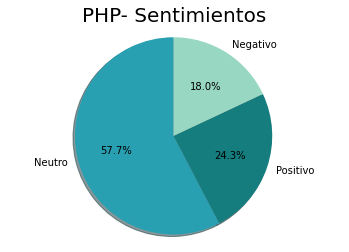

In [61]:
import matplotlib.pyplot as plt
labels = 'Neutro', 'Positivo', 'Negativo'
colors = ['#29A0B1','#167D7F','#98D7C2']
plt.pie(df['result'].value_counts(), labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.title('PHP- Sentimientos', fontsize = 20)
plt.axis('equal')
plt.show()

In [54]:
from wordcloud import WordCloud
text = ' '.join(df.clean_text)
text

'🏅🏅🏅🏅APRENDE PYTHON🏅🏅🏅🏅\n👨🏻\u200d💻👨🏻\u200d💻👨🏻\u200d💻👨🏻\u200d💻 INSCRÍBETE HOY👨🏻\u200d💻👨🏻\u200d💻👨🏻\u200d💻👨🏻\u200d💻\n💥💥Libros y Curso Disponibles💥💥\n\npython…  Desarrollador PHP Magento (ID: 1766278)  Atrévete a iniciarte en la programación de la mano de PHP desde cero php  Descarga el código fuente de nuestros artículos.  post jrgonzalez - Recortar y redimensionar imágenes en PHP – imagecopyresampled  Debate: PHP, nadie es profeta en su propia tierra, con la participación ... php Laravel Cómo enviar los datos recogidos a través de un formulario HTML por mail con php  Cómo enviar los datos recogidos a través de un formulario HTML por mail con php  En este video hacemos un uploader de archivos con AJAX y PHP.  Si hablaron de "estandarización y tipificación" entonces no era una charla de de PHP. Jefe de Proyecto PHP  ACoruña PHP empleo tic it  OpenSUSE - Review versión 15.2 \nyast kernel linux unix suse ubuntu server centos fedora redhat debian…  Tener un listado de los archivos php y tiemp

In [55]:
wordcloud = WordCloud(width=1024, height=800, colormap='Blues', min_font_size=14).generate(text)

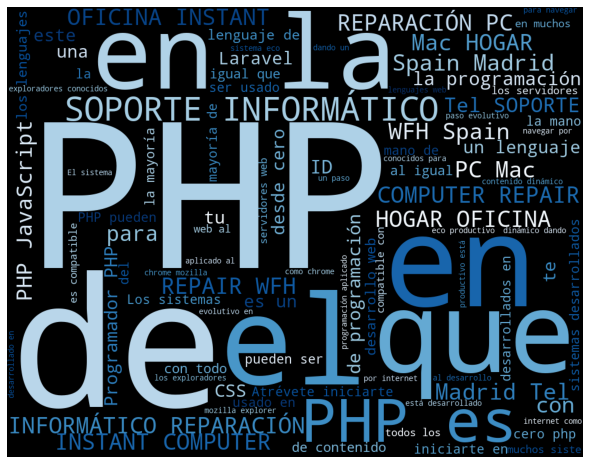

In [56]:
plt.figure(figsize= (8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()